In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from extract_bc03 import TemplateSED_BC03
import pandas as pd
import scipy as sp
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
srcRootDir = '/Applications/Scientific/bandc_2003_galaxev/'
modelRootDir = '/Users/hughdickinson/Documents/Physics/WISPS_Hubble_Constraint/BCModels'
workDirRoot = '/Users/hughdickinson/Documents/Physics/WISPS_Hubble_Constraint/testDir'

In [3]:
template = TemplateSED_BC03(metallicity=0.02, age=[1,2,3,5,10], sfh='single', tau=0.5, Av=1,
                                dust='calzetti', emlines=False,
                                redshift=2, igm=True,
                                imf='chab', res='hr', uid='test', units='fnu',
                                rootdir=srcRootDir, modelsdir=modelRootDir,workdir=workDirRoot,
                                library_version=2016, library='xmiless',
                                cleanup=True,verbose=True)

In [4]:
template.generate_sed()

(10000.0, 1e+16)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


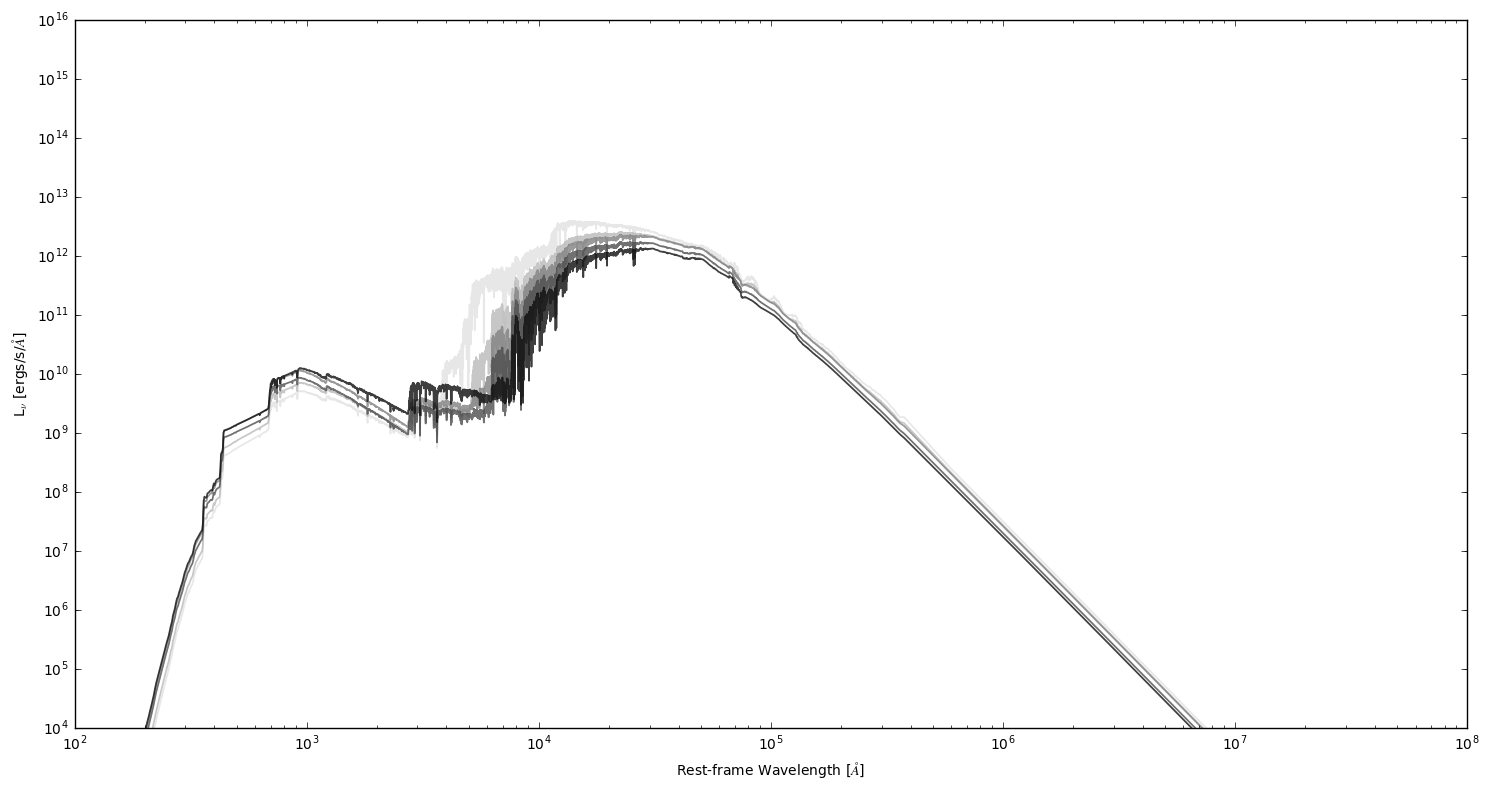

In [14]:
fig, ax = plt.subplots(1,1,figsize=(15,8),dpi=75,tight_layout=True)

cind = np.linspace(0.2,0.95,5)
for x,c in zip(template.sed.dtype.names[1:],plt.cm.Greys(cind)):
    ax.plot(template.sed['waves'],template.sed[x],c=c,lw=1.25,alpha=0.8)

'''template.add_emlines()
for x,c in zip(template.sed.dtype.names[1:],plt.cm.Blues(cind)):
    ax.plot(template.sed['waves'],template.sed[x],c=c,lw=1.25,alpha=0.8)

template.add_dust()
for x,c in zip(template.sed.dtype.names[1:],plt.cm.Reds(cind)):
    ax.plot(template.sed['waves'],template.sed[x],c=c,lw=1.25,alpha=0.8)'''

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Rest-frame Wavelength [$\AA$]')
ax.set_ylabel('L$_{\\nu}$ [ergs/s/$\AA$]')
ax.set_xlim(1e2,1e8)
ax.set_ylim(1e4,1e16)

In [6]:
f160ResponseFile = '/Users/hughdickinson/Documents/Physics/WISPS_Hubble_Constraint/HST_Responses/HST_WFC3_IR.F160W.dat.txt'
f160ResponseWavelengths = []
f160ResponseValues = []
f160Response = pd.read_csv(f160ResponseFile, header=None, names=['wavelength', 'response'], delim_whitespace=True)

In [7]:
print(f160Response)

      wavelength  response
0       13714.24  0.000406
1       13715.35  0.000415
2       13716.47  0.000423
3       13717.58  0.000431
4       13718.69  0.000440
5       13719.80  0.000448
6       13720.92  0.000456
7       13722.03  0.000465
8       13723.14  0.000473
9       13724.26  0.000481
10      13725.37  0.000490
11      13726.48  0.000498
12      13727.60  0.000506
13      13728.71  0.000515
14      13729.82  0.000523
15      13730.94  0.000531
16      13732.05  0.000540
17      13733.17  0.000548
18      13734.28  0.000556
19      13735.39  0.000565
20      13736.51  0.000573
21      13737.62  0.000581
22      13738.74  0.000589
23      13739.85  0.000598
24      13740.97  0.000606
25      13742.08  0.000614
26      13743.20  0.000623
27      13744.31  0.000633
28      13745.43  0.000644
29      13746.54  0.000655
...          ...       ...
2695    17065.37  0.001184
2696    17066.75  0.001152
2697    17068.13  0.001120
2698    17069.52  0.001088
2699    17070.90  0.001056
2

In [8]:
interpResponse = sp.interpolate.InterpolatedUnivariateSpline(f160Response.wavelength.values, f160Response.response.values)

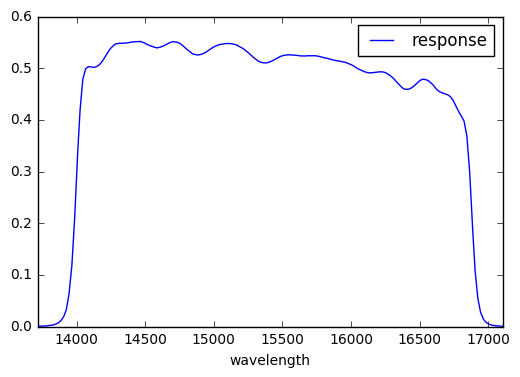

In [9]:
f160Response.plot.line(x='wavelength', y='response')

Thomas et al.

Renzini annual review formation of massive galaxies.

Most massive galaxies have narrow ~50MYr peaks in SF at early times.

Simulate Spectra using synthetic spectra and WISPS resolution. Perform D4000 analysis and determine sensitivity. aXeSim or best case (uncontaminated) scenario?

In [10]:
color4FileName = '/Users/hughdickinson/Documents/Physics/WISPS_Hubble_Constraint/BCModels/Miles_Atlas/Chabrier_IMF/bc2003_hr_xmiless_m22_chab_ssp.4color'
color4Columns = ['log-age-yr','Mbol','Bmag','Vmag','Kmag','M*_liv','M_remnants','M_ret_gas','M_galaxy','SFR/yr','M*_liv+M_rem','M*_tot/Lb','M*_tot/Lv','M*_tot/Lk','M*_liv/Lb','M*_liv/Lv','M*_liv/Lk']
color4Frame = pd.read_csv(color4FileName, delim_whitespace=True, comment='#', header=None, names=color4Columns)

In [11]:
print(color4Frame)

     log-age-yr    Mbol    Bmag    Vmag    Kmag   M*_liv  M_remnants  \
0      5.000000 -2.7063  1.3471  1.6233  2.4001  1.00000     0.00000   
1      5.149989 -2.7063  1.3471  1.6233  2.4001  1.00000     0.00000   
2      5.200002 -2.7063  1.3471  1.6233  2.4001  1.00000     0.00000   
3      5.250005 -2.7063  1.3471  1.6233  2.4001  1.00000     0.00000   
4      5.300008 -2.7063  1.3471  1.6233  2.4001  1.00000     0.00000   
5      5.349996 -2.7063  1.3471  1.6233  2.4001  1.00000     0.00000   
6      5.400002 -2.7002  1.3466  1.6226  2.3993  1.00000     0.00000   
7      5.450003 -2.7052  1.3436  1.6197  2.3969  1.00000     0.00000   
8      5.500003 -2.7121  1.3397  1.6159  2.3937  1.00000     0.00000   
9      5.550008 -2.7200  1.3355  1.6118  2.3902  0.99999     0.00000   
10     5.600003 -2.7059  1.3423  1.6181  2.3947  0.99998     0.00000   
11     5.650006 -2.7003  1.3434  1.6189  2.3948  0.99998     0.00000   
12     5.700002 -2.7080  1.3405  1.6159  2.3918  0.99998     0.0

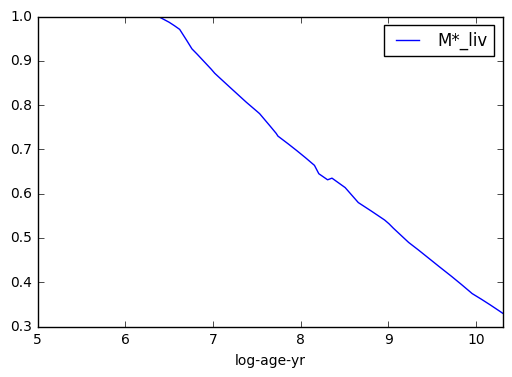

In [12]:
color4Frame.plot.line(x='log-age-yr', y='M*_liv')